<a href="https://colab.research.google.com/github/afc523/Portfolio/blob/main/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sea
plt.style.use('ggplot')

In [6]:
#File upload
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Movies.csv to Movies.csv
User uploaded file "Movies.csv" with length 3423186 bytes


In [7]:
df = pd.read_csv('Movies.csv')
df.shape

(10000, 8)

In [8]:
df.head()

,Title,Description,Genre,Vote_Count,Release_Date,Vote_Average,Original_Language,Popularity
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime",18659,14-03-1972,8.7,en,121.565
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",24630,23-09-1994,8.7,en,90.831
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",11281,20-12-1974,8.6,en,59.091
3,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",14576,15-12-1993,8.6,en,73.969
4,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance",4251,20-10-1995,8.6,hi,26.876


About Dataset
TMDB Top Rated Movies Dataset

The "TMDB Top Rated Movies Dataset" is an extensive compilation of data showcasing a curated list of critically acclaimed and beloved movies from diverse genres, spanning multiple decades of cinematic excellence. This dataset serves as an invaluable resource for movie enthusiasts, researchers, and data analysts interested in exploring and analyzing the characteristics and trends of top-rated films.

Key Features:

Title: The commonly known or marketed title of each movie in its respective language.

Description: Gain insight into each movie's plot or storyline with concise summaries provided in the "overview" feature.

Genres: Unlike many datasets, our dataset includes the actual genres of each movie, such as Animation, Thriller, Romance, and more. This provides a more intuitive understanding of a film's categorization.

Vote Count: An indicator of a movie's engagement and popularity, showcasing the number of votes or ratings received from the audience.

Release Date: The release date of each movie, presented in the format "YYYY-MM-DD," allowing for temporal analysis.

Vote Average: A numerical score representing the average rating given to the movie by the audience, ranging from 0 to 10.

Original Language: The original language in which a movie was produced is represented as a two-letter language code (e.g., "en" for English, "fr" for French).

Popularity: A numerical value quantifying a movie's popularity among the audience relative to other films in the dataset.

Potential Applications:

The "TMDB Top Rated Movies Dataset" offers a multitude of applications, including:

Movie Analysis: Researchers can delve into trends and patterns in movie genres, ratings, and box office performance for highly regarded films.

Recommender Systems: Utilize this dataset as a foundation for developing movie recommendation algorithms or systems that suggest top-rated movies to users based on their preferences.

Filmmaking Insights: Filmmakers can glean valuable insights into successful movie genres, directors, and actors that have consistently garnered critical acclaim, aiding in strategic decision-making.

Data Visualization: Data analysts and enthusiasts can craft compelling visualizations to depict relationships between various movie attributes, making complex insights more accessible.

Comparison Studies: This dataset facilitates comparisons between different rating systems, such as IMDb and Metascore, enabling researchers to explore disparities or correlations in critical assessments.

In [16]:
df.columns

Index(['Title', 'Description ', 'Genre', 'Vote_Count', 'Release_Date',
       'Vote_Average', 'Original_Language', 'Popularity'],
      dtype='object')

In [17]:
df.dtypes

Title                        object
Description                  object
Genre                        object
Vote_Count                    int64
Release_Date         datetime64[ns]
Vote_Average                float64
Original_Language            object
Popularity                  float64
dtype: object

In [18]:
df.describe()

,Vote_Count,Vote_Average,Popularity
count,10000.000000,10000.000000,10000.000000
mean,1687.816700,6.782310,23.483915
std,2913.079731,0.629307,62.014862
min,200.000000,5.700000,0.600000
25%,323.000000,6.300000,11.165500
50%,616.000000,6.700000,15.118000
75%,1608.250000,7.200000,22.600500
max,34470.000000,8.700000,2763.496000


In [19]:
# if there is a no value
df.isna()

,Title,Description,Genre,Vote_Count,Release_Date,Vote_Average,Original_Language,Popularity
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False


In [20]:
# Number of missing values in each column
df.isna().sum()

Title                0
Description          2
Genre                4
Vote_Count           0
Release_Date         0
Vote_Average         0
Original_Language    0
Popularity           0
dtype: int64

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [22]:
df.loc[df.duplicated()]

,Title,Description,Genre,Vote_Count,Release_Date,Vote_Average,Original_Language,Popularity


In [27]:
df.duplicated(subset=['Title','Genre','Release_Date']).sum()

0

In [28]:
df

,Title,Description,Genre,Vote_Count,Release_Date,Vote_Average,Original_Language,Popularity
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime",18659,1972-03-14,8.7,en,121.565
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",24630,1994-09-23,8.7,en,90.831
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",11281,1974-12-20,8.6,en,59.091
3,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",14576,1993-12-15,8.6,en,73.969
4,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance",4251,1995-10-20,8.6,hi,26.876
...,...,...,...,...,...,...,...,...
9995,The Tuxedo,Cabbie-turned-chauffeur Jimmy Tong learns ther...,"Thriller,Action,Comedy,Science Fiction",1758,2002-09-27,5.7,en,19.312
9996,First Kill,A police chief tries to solve a kidnapping tha...,"Action,Thriller,Crime",509,2017-07-21,5.7,en,14.001
9997,Rough Night,Five best friends from college reunite 10 year...,"Drama,Comedy",1888,2017-06-15,5.7,en,19.115
9998,Surviving Christmas,"Drew Latham is an executive leading an empty, ...","Comedy,Romance",480,2004-09-21,5.7,en,10.551


In [29]:
df['Genre'].value_counts()

Drama                                                       685
Comedy                                                      622
Drama,Romance                                               316
Comedy,Drama                                                280
Comedy,Romance                                              248
                                                           ... 
Science Fiction,Horror,Drama                                  1
Fantasy,Animation,Family,Adventure,Comedy,Mystery,Horror      1
War,History,Drama,Action                                      1
Family,Animation,Fantasy,Music,Comedy,Adventure               1
Thriller,Action,Comedy,Science Fiction                        1
Name: Genre, Length: 2130, dtype: int64

In [35]:
# Genres that have more than 50 counts listed and sorted based on vote average mean
df.groupby('Genre')['Vote_Average'] \
.agg(['count','sum', 'mean']) \
.query('count >= 50') \
.sort_values('mean', ascending=False)

,count,sum,mean
Genre,,,
"Drama,Crime",58,422.2,7.279310
Drama,685,4893.2,7.143358
"Romance,Drama",79,562.9,7.125316
"Crime,Drama",90,639.8,7.108889
"Drama,History",128,909.1,7.102344
"Animation,Family",54,378.5,7.009259
"Drama,Romance",316,2213.1,7.003481
"Drama,Comedy",131,911.0,6.954198
"Crime,Drama,Thriller",92,636.9,6.922826


<Axes: title={'center': 'Vote Averages'}, ylabel='Frequency'>

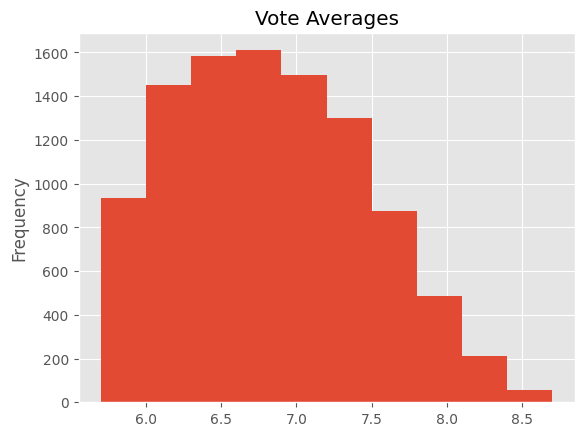

In [40]:
df['Vote_Average'].plot(kind='hist', title='Vote Averages')

Text(0, 0.5, 'Count')

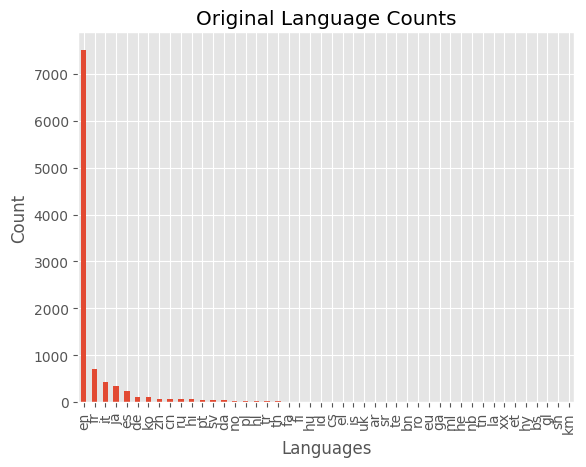

In [41]:
ax = df['Original_Language'].value_counts() \
.plot(kind='bar', title='Original Language Counts')
ax.set_xlabel('Languages')
ax.set_ylabel('Count')

Text(0.5, 0, 'Vote Averages')

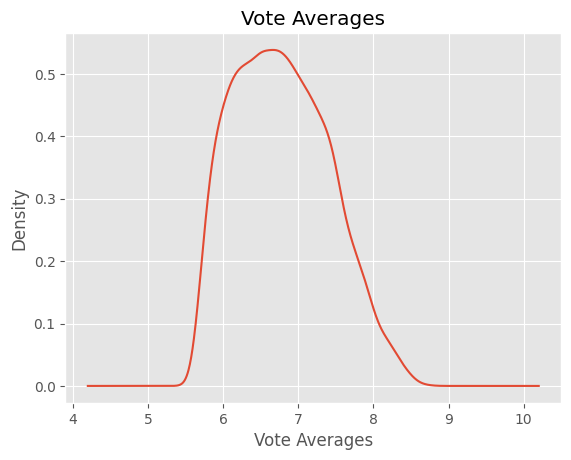

In [42]:
ax = df['Vote_Average'].plot(kind='kde', title='Vote Averages')
ax.set_xlabel('Vote Averages')

Text(0.5, 0, 'Popularity')

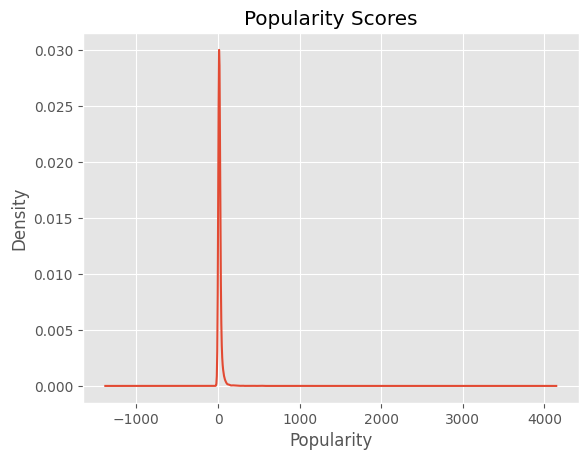

In [43]:
ax = df['Popularity'].plot(kind='kde', title='Popularity Scores')
ax.set_xlabel('Popularity')

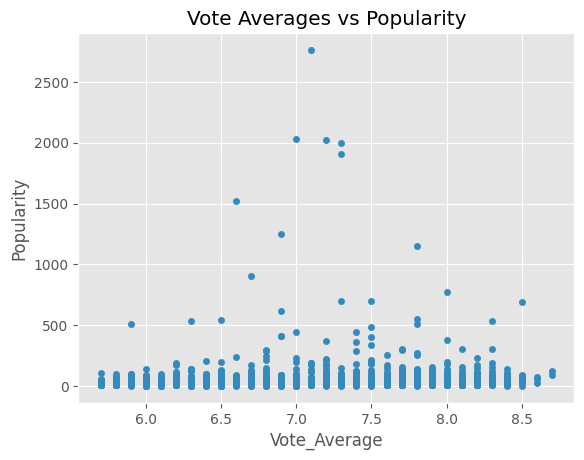

In [44]:
df.plot(kind='scatter', x='Vote_Average', y='Popularity',
title='Vote Averages vs Popularity')
plt.show()

<Axes: xlabel='Vote_Average', ylabel='Popularity'>

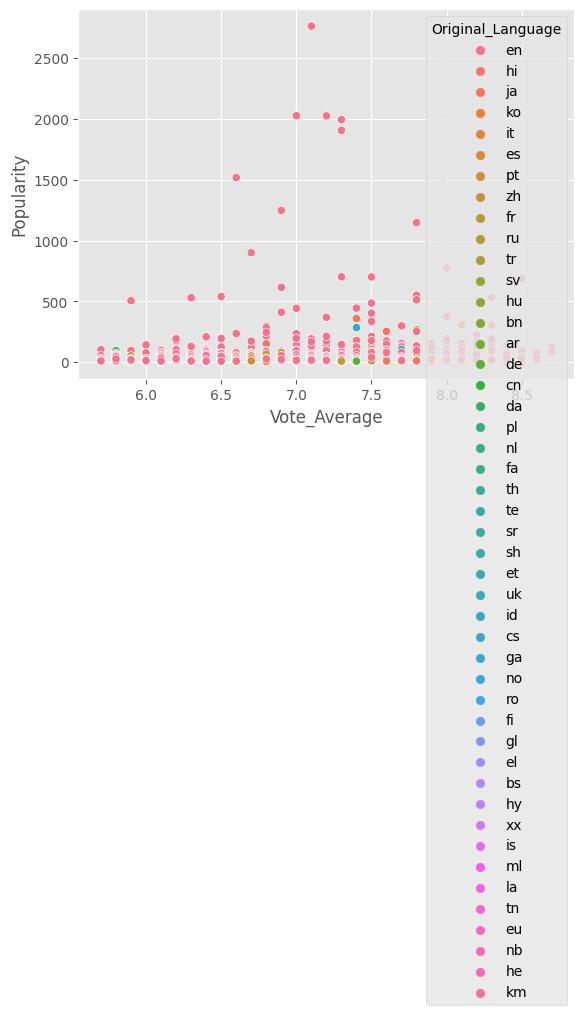

In [46]:
sea.scatterplot(x='Vote_Average', y='Popularity', hue='Original_Language', data=df)

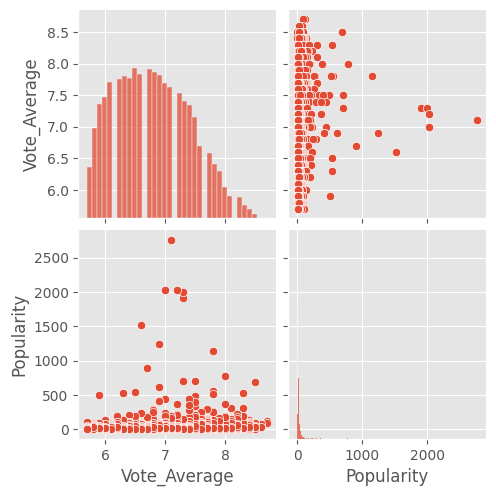

In [49]:
sea.pairplot(df, vars=['Vote_Average','Popularity'])
plt.show()

In [52]:
# Correlation and drop any no values
df_corr = df[['Vote_Average','Popularity','Vote_Count']].dropna() \
.corr()
df_corr

,Vote_Average,Popularity,Vote_Count
Vote_Average,1.000000,0.086897,0.257931
Popularity,0.086897,1.000000,0.179200
Vote_Count,0.257931,0.179200,1.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_corr, *['Vote_Average'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_corr, *['Popularity'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_corr, *['Vote_Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_corr, *['Vote_Average'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_corr, *['Popularity'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_corr, *['Vote_Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_corr, *[[['Vote_Average', 'Popularity'], ['Popularity', 'Vote_Count']]], **{})
chart

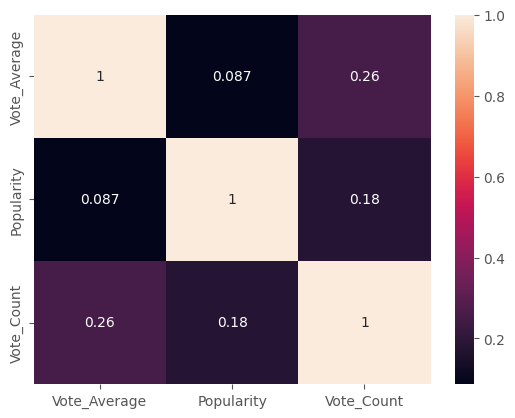

In [53]:
sea.heatmap(df_corr, annot=True)
plt.show()

In [57]:
# Which languages has the highest average Vote?
df.groupby('Original_Language')['Vote_Average'] \
.agg(['count','sum', 'mean']) \
.query('count >= 50') \
.sort_values('mean', ascending=False)

,count,sum,mean
Original_Language,,,
ko,103,760.7,7.385437
ja,333,2434.9,7.312012
hi,57,409.7,7.187719
ru,59,424.0,7.186441
de,114,815.2,7.150877
zh,75,531.8,7.090667
es,231,1626.0,7.038961
cn,70,491.8,7.025714
it,436,2980.1,6.835092


<Axes: title={'center': 'Best Movies'}, ylabel='Title'>

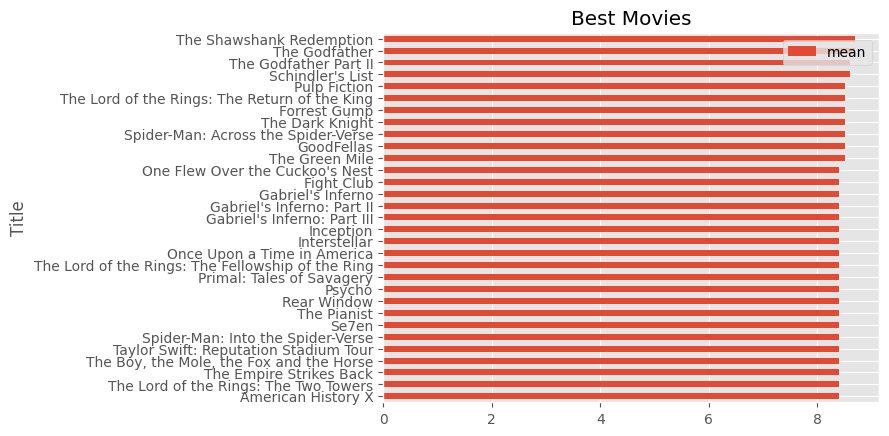

In [70]:
# Best movies in English sorted based on Vote Average
df.query('Original_Language == "en"') \
.groupby('Title')['Vote_Average'] \
.agg(['mean']) \
.query('mean > 8.39') \
.sort_values('mean') \
.plot(kind='barh', title='Best Movies')